1. 데이터를 읽어들이고 확인하기

In [43]:
import pandas as pd
campaign_master = pd.read_csv('./data_3/campaign_master.csv')
campaign_master

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [44]:
class_master = pd.read_csv('./data_3/class_master.csv')
class_master

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


고객 id , 이름, 회원클래스, 성별, 시작일, 끝난일, 캠패인 아이디, 2019년도 3월에 탈락한 유저시점

In [45]:
customer = pd.read_csv('./data_3/customer_master (1).csv') 
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


고객id와 이용일에 대한 데이터

In [46]:
use_log = pd.read_csv('./data_3/use_log.csv')
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


2. 고객데이터를 가공하자

customer data + class_master = customer_join 고객데이터 중심으로 레프트 조인

campaign_master 도 join

In [47]:
customer_join = pd.merge(customer, class_master,on = 'class', how = 'left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [48]:
# 결측치 확인
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

아직 회원이 탈퇴하지 않아서 결측치일 수 있음.

3. 고객데이터를 집계하자

- 어떤 회원과 어떤 캠패인이 많은지 분석

- 언제 입회/ 탈퇴가 많은지 분석

- 남녀 비율이 얼마인지 분석

- 탈퇴할 떄 까지의 기간은 얼마나 되는지 분석

In [49]:
customer_join['campaign_name'].value_counts()

campaign_name
2_일반         3050
0_입회비반액할인     650
1_입회비무료       492
Name: count, dtype: int64

캠페인은 일반> 입회비반액할인> 입회비무료 순으로 적어진다.

In [50]:
customer_join['class_name'].value_counts()

class_name
0_종일    2045
2_야간    1128
1_주간    1019
Name: count, dtype: int64

클래스는 종일> 야간> 주간 순으로 적어진다.

In [51]:
customer_join['start_date'].value_counts()

start_date
2017-12-01 00:00:00    160
2017-08-01 00:00:00    122
2018-01-01 00:00:00    122
2017-09-01 00:00:00    115
2017-11-01 00:00:00    108
                      ... 
2018-09-11 00:00:00      1
2018-10-02 00:00:00      1
2019-02-02 00:00:00      1
2019-03-10 00:00:00      1
2019-03-15 00:00:00      1
Name: count, Length: 215, dtype: int64

가장 많이 회원가입 한 날짜는 2017-12-01로 160명 가입하였다.

In [52]:
customer_join['end_date'].value_counts()

end_date
2019-02-28 00:00:00    149
2019-01-31 00:00:00    129
2018-05-31 00:00:00    125
2018-04-30 00:00:00    121
2018-08-31 00:00:00    113
2018-12-31 00:00:00    111
2019-03-31 00:00:00    111
2018-06-30 00:00:00    106
2018-09-30 00:00:00    104
2018-07-31 00:00:00    102
2018-10-31 00:00:00     90
2018-11-30 00:00:00     89
Name: count, dtype: int64

탈퇴가 가장 많은 날짜는 2019-02-28 로 149명이 탈퇴하였다.

gender
M    2209
F    1983
Name: count, dtype: int64


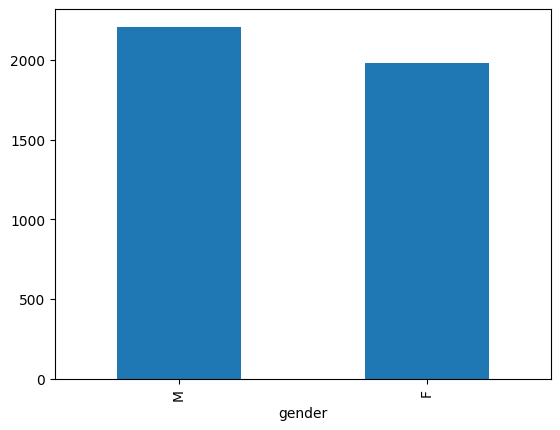

In [53]:
# 남녀비율
gender = customer_join['gender'].value_counts()
gender.plot(kind = 'bar')
print(gender)

남성회원은 2209명, 여성회원은 1983으로 여성회원보다 남성회원이 226명 더 많다. 

In [54]:
# 탈퇴할 때 까지의 기간
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 360.4+ KB


In [55]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [56]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

In [57]:
customer_join['is_deleted_1'] = customer_join['end_date'] - customer_join['start_date']

In [58]:
customer_join['is_deleted_1'].value_counts()

is_deleted_1
364 days    83
395 days    62
303 days    50
211 days    46
272 days    38
            ..
167 days     1
137 days     1
61 days      1
44 days      1
75 days      1
Name: count, Length: 204, dtype: int64

In [59]:
# drop하기
customer_join.drop(columns = 'is_deleted_1',inplace = True)

In [60]:
# 2019.03에 탈퇴한 유저 수
customer_join['is_deleted'].value_counts()

is_deleted
0    2842
1    1350
Name: count, dtype: int64

4. 최신 고객 데이터를 집계하자

In [61]:
# loc은 행을 뽑아냄, date가 31일보다 크다는 건 아직 31일 기준으로 탈퇴 안 한 회원, 탈퇴일이  결측치(아직 탈퇴안함)인 행 뽑기
customer_newer =  customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331'))|(customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [62]:
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [63]:
print(customer_newer['class_name'].value_counts())
print(customer_newer['campaign_name'].value_counts())
print(customer_newer['gender'].value_counts())

class_name
0_종일    1444
2_야간     813
1_주간     696
Name: count, dtype: int64
campaign_name
2_일반         2400
0_입회비반액할인     311
1_입회비무료       242
Name: count, dtype: int64
gender
M    1553
F    1400
Name: count, dtype: int64


클래스는 종일> 야간> 주간 순이며, 종일이 1444건으로 가장 많다.

현재 가입한 일반회원이 2400명으로 가장 많고 여성보다 남성이 많다고 집계되었다.

5. 이용 이력 데이터를 집계하자.

월 이용 횟수의 평균값, 중앙값, 최빈값, 최솟값과 정기적 이용 여부를 플래그로 작성해서 고객 데이터에 추가

In [64]:
use_log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [65]:
use_log.groupby('customer_id')['usedate'].count()

customer_id
AS002855    54
AS008805    40
AS009013     2
AS009373    61
AS015233    83
            ..
TS995853    19
TS998593    57
TS999079    59
TS999231    56
TS999855    55
Name: usedate, Length: 4192, dtype: int64

In [66]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['year_month'] = use_log['usedate'].dt.strftime('%Y%m')
use_log

,log_id,customer_id,usedate,year_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [67]:
use_log_month = use_log.groupby(['year_month','customer_id'],as_index = False).count()
use_log_month # as_index:그룹화 인덱스 해제

,year_month,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [68]:
# 고객별로 이용횟수 구하기
use_log_month.rename(columns = {'log_id':'count'},inplace = True)
del use_log_month['usedate']
use_log_month

,year_month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [69]:
# 고객별로 평균값, 중앙값, 최대/최솟값구하기
uselog_customer = use_log_month.groupby('customer_id')['count'].agg(['mean','median','max','min'])

uselog_customer = uselog_customer.reset_index(drop = False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


6. 이용 이력 데이터로부터 정기 이용 플래그를 작성하자

월별 정기적 이용 여부는 고객에 따라 다르겠지만, 고객마다 월/요일별로 집계하여 최댓값이 4이상인 요일이 하나라도 있는 회원은 플래그로 1로 처리한다.

In [70]:
use_log['weekday'] = use_log['usedate'].dt.weekday # 0:월 ~ 6:일
uselog_weekday = use_log.groupby(['customer_id','year_month','weekday'],as_index = False)[['weekday','log_id']].count()
uselog_weekday.rename(columns = {'log_id':'count'},inplace = True)
uselog_weekday

,customer_id,year_month,weekday,count
0,AS002855,201804,4,4
1,AS002855,201805,1,1
2,AS002855,201805,4,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,4,4
93330,TS999855,201901,1,1
93331,TS999855,201902,4,4


In [71]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index = False)[['customer_id','count']].max()
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4 ,1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


7. 고객 데이터와 이용 이력 데이터를 결합

In [72]:
customer_join = pd.merge(customer_join,uselog_customer,on ='customer_id', how='left')

customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']], on = 'customer_id', how = 'left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


8. 회원기간 계산

여기서 탈퇴하지 않은 사람은 2019년 4월 30일로 채워서 회원기간을 계산합니다.

In [ ]:
from dateutil.relativedelta import relativedelta
import pandas as pd

# end_date가 NaT면 2019-04-30으로 대체
customer_join['calc_date'] = customer_join['end_date'].fillna(pd.to_datetime('20190430'))

# membership_period 계산 함수
def calc_period(row):
    delta = relativedelta(row['calc_date'], row['start_date']) # 날짜 차이 계산
    return delta.years * 12 + delta.months # 개월수

# apply로 벡터화
customer_join['membership_period'] = customer_join.apply(calc_period, axis=1)

customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


9. 고객 행동

In [74]:
customer_join[['mean','median','max','min']].describe() # 고객 접속 횟수 통계

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [75]:
customer_join.groupby('routine_flg')['customer_id'].count()

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

정기적으로 이용하는 고객이 훨씬 많음을 보여줌

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

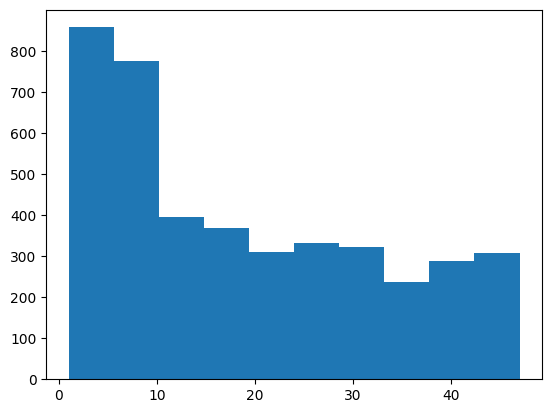

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])

멤버쉽 기간이 10개월 이상인 고객의 수는 일정한 것을 볼 수 있는데 10개월 전으로는 많았는데 후로 없는 걸 봐서는 짧은 기간에 고객이 빠져나가는 업계라고 볼 수 있다.

10. 탈퇴 회원과 지속 회원의 차이 파악

In [77]:
customer_end = customer_join.loc[customer_join['is_deleted']==1] # 탈퇴함
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [78]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761
